In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt 

from pathlib import Path
%matplotlib inline 

In [2]:
X = np.array([[5,3],[10,15],[15,12],[24,10],
    [30,30],[85,70],[71,80],[60,78],[70,55],
    [80,91],])

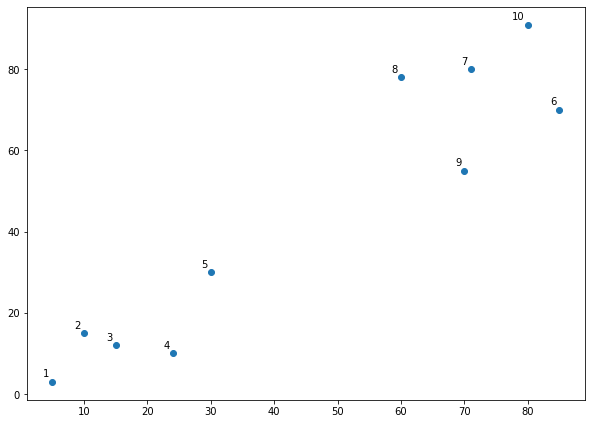

In [3]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

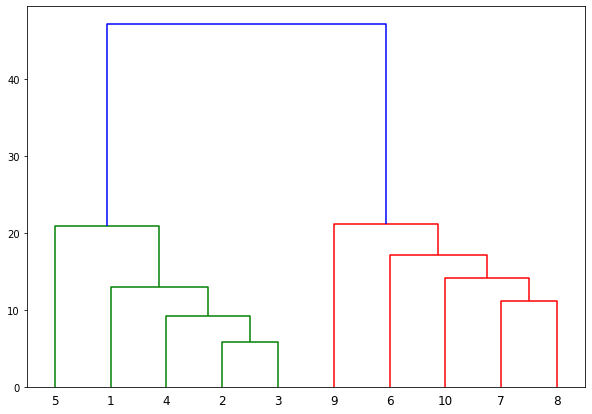

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

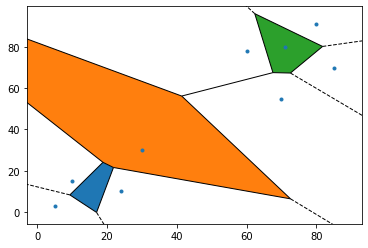

In [5]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# compute Voronoi tesselation
vor = Voronoi(X)

# plot
voronoi_plot_2d(vor, show_vertices = False)

# colorize
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))